In [1]:
from mt_rent_statement import *

### Load data

In [2]:
start='2022-08-01'
end='2022-08-31'
dfT=load_tenancies('all_tenancies.xls')
dfAll=load_data(start,end)
dfAll.head(3)

WARNING *** file size (106483) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\AUG2022_codedAndCategorised.xlsx


E:\dtuklaptop\e\Users\Mat\python\14. property\PropertyAnalytics_v2\mt_rent_statement.py:163: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dfAll=pd.concat([dfAll,dfTemp])


,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-08-01,20-74-09 60458872,-243.13,Direct Debit,PLATFORM FUNDING \t01050230313307 DDR\t,NaN,NaN,Mortgage,NaN
2022-08-01,20-74-09 60458872,850.00,Funds Transfer,FYLES GR \tRENT FT\t,F11618ALH,NaN,OurRent,NaN
2022-08-01,20-74-09 60458872,-13.59,Card Purchase,AMZNMktplace \tON 30 JUL BCC\t,NaN,NaN,PersonalExpense,Amazon


### Rent Statement

In [3]:
paidinadvancelist = ['Jason Moore (23/05/2022)','Peter Gradon (28/02/2018)'] # November
inarrearslist = ['Mark Williams (25/09/2019)']
dfRs=get_rent_statement(dfAll, dfT, start, end, inarrearslist, paidinadvancelist)
dfRs=dfRs.round(0)
#dfRs.sort_values(by=['Net'], ascending=False).style.apply(custom_style, axis=1)
#dfRs.sort_values(by=['Bills'], ascending=True).style.apply(custom_style, axis=1)
dfRs.style.apply(custom_style, axis=1)

,Tenant,Agent,Received,Bills,Mortgage,Net,Status
Property,,,,,,,
321 London Rd,,,0,0,0,0,
Flat 1 - 321 London Rd,Sharon Briscoe (25/01/2019-23/09/2022),Beals,446,0,-213,233,Paid
Flat 2 - 321 London Rd,Cipran Georgescu (18/01/2020),None,550,0,-213,337,Paid
Flat 3 - 321 London Rd,Adebusola Ibiyemi (31/03/2021-15/09/2022),None,358,0,-159,199,Paid
Flat 4 - 321 London Rd,Susheel Kumar (26/04/2022-28/10/2022),None,750,0,-213,537,Paid
169 Fawcett Rd,,,0,-115,0,-115,
Flat 1 - 169 Fawcett Rd,Susan Parkinson (06/11/2016),Beals,421,-1188,-192,-959,Paid
Flat 2 - 169 Fawcett Rd,Vaclav Hajek (10/08/2019),None,495,0,-158,337,Paid
Flat 3 - 169 Fawcett Rd,August John (14/05/2022),None,675,0,-215,460,Paid


Notes:
- Gary Fyles paid for September at end of August (so paid for two months)

### Income/Expenditure per Property

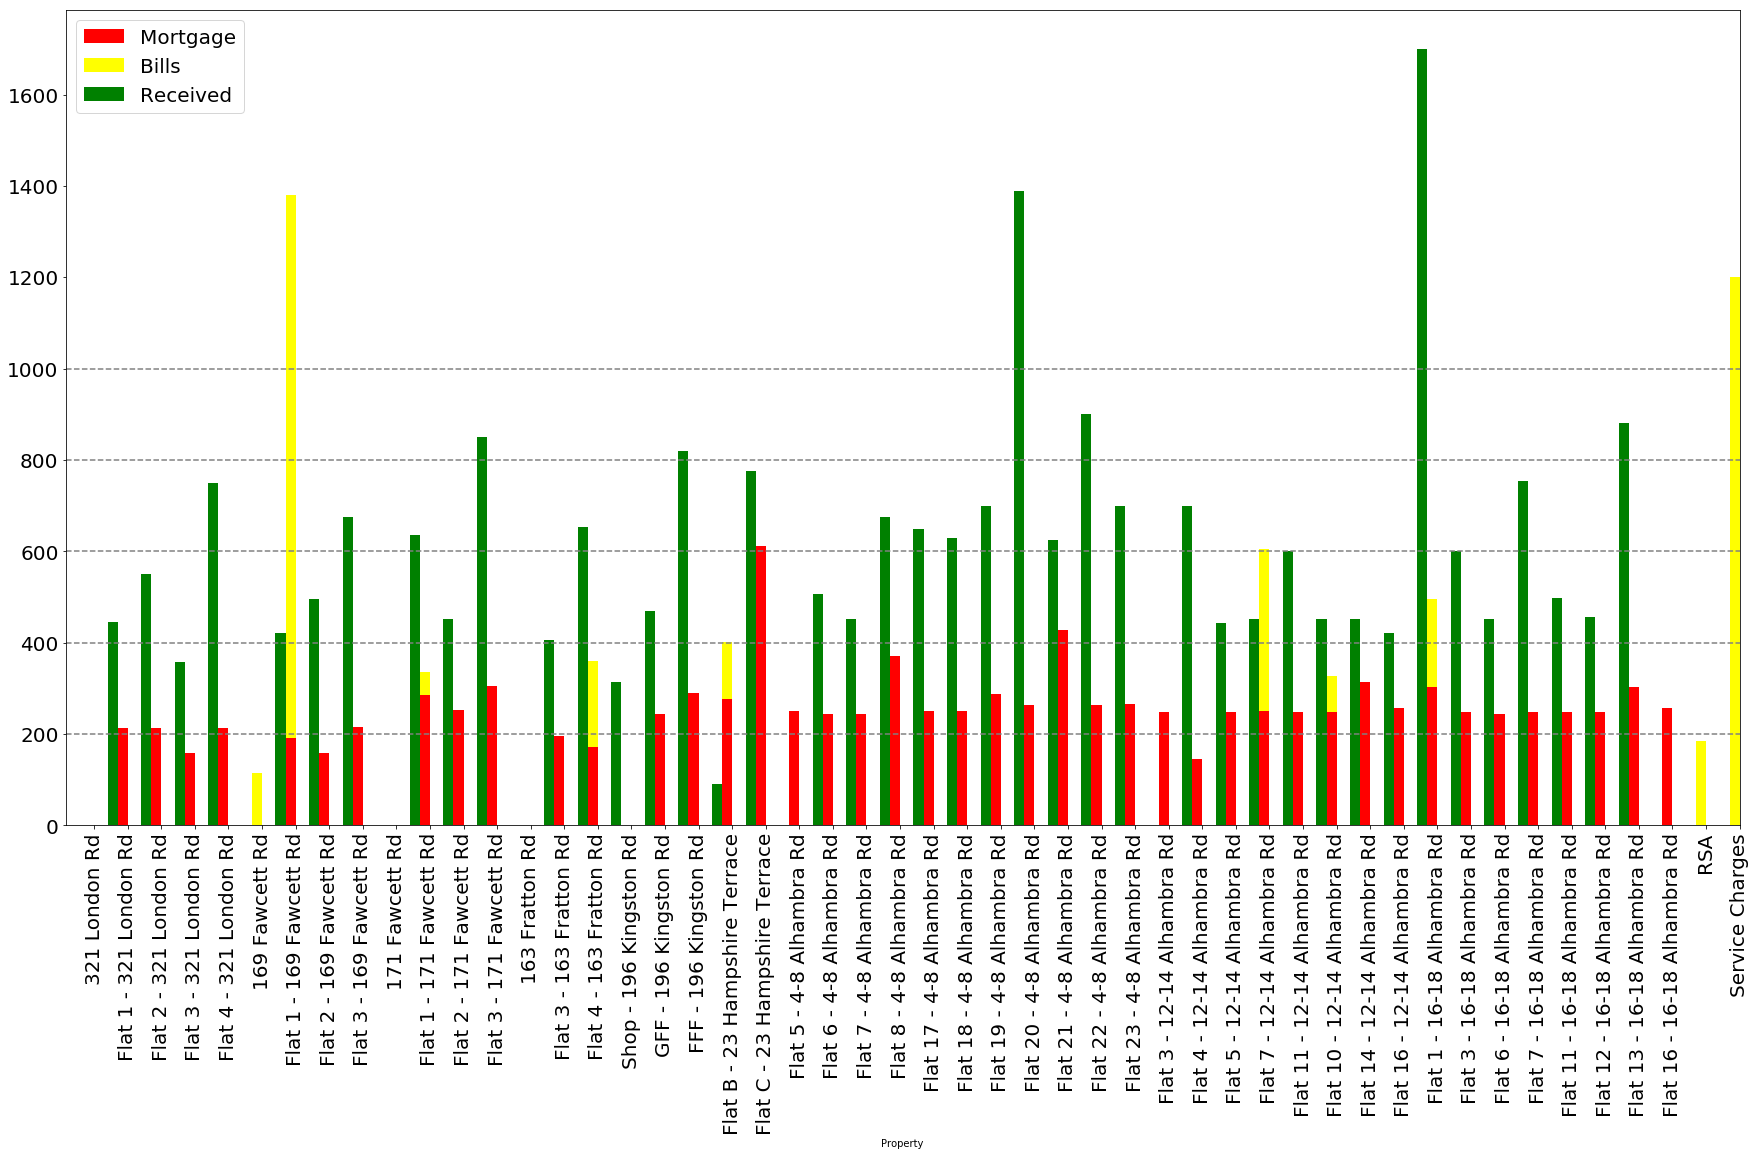

In [4]:
plot_income_expenditure_per_property(dfRs[:-1])

### Net Income Per Property

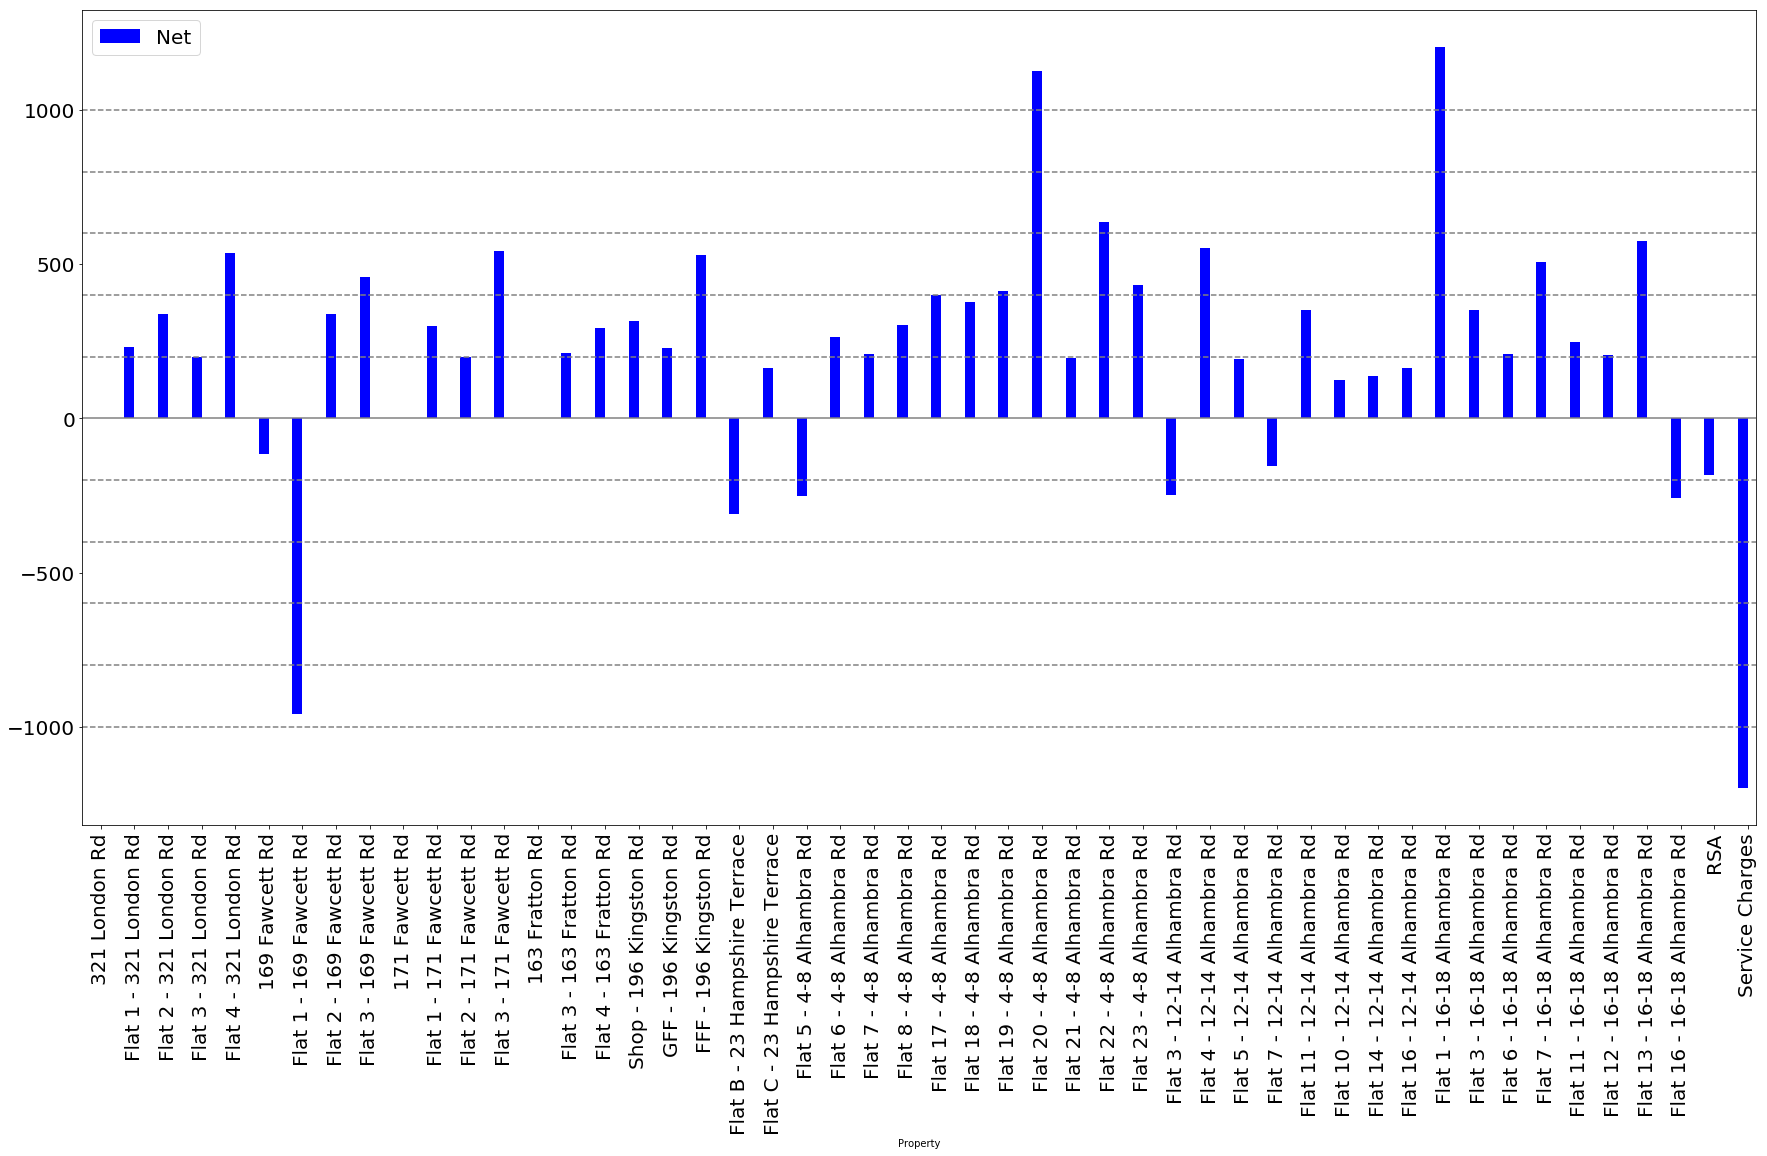

In [5]:
plot_net_income(dfRs[:-1])

### Accounts Check
Check Drawings against expenses

In [6]:
dfAll[(dfAll.Cat=='RegularPayment')|(dfAll.Cat=='PersonalExpense')|(dfAll.Cat=='Hilltop')|(dfAll.Cat=='HMRCDD')|(dfAll.Cat=='Drawings')|(dfAll.Cat=='SchoolFee')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
HMRCDD,-600.00,0.0
Hilltop,-300.00,0.0
PersonalExpense,-3338.71,0.0
RegularPayment,-630.17,0.0


In [7]:
dfAll.groupby(['Account','Cat']).sum().style.apply(custom_style_accounts_cat, axis=1)

#### Mortgage check
Check mortgages refunded from business account

In [8]:
dfMtg=dfAll[((dfAll.Cat=='Mortgage')|(dfAll.Cat=='MortgageRefund'))&(dfAll.Account!='60-83-71 00558156')].groupby(['Account','Cat']).Amount.sum()
dfMtg=dfMtg.reset_index().pivot('Account','Cat')
dfMtg.columns=dfMtg.columns.get_level_values(1)
if('MortgageRefund' not in dfMtg.columns):
    dfMtg['MortgageRefund']=0
dfMtg['Diff']=dfMtg.Mortgage + dfMtg.MortgageRefund
dfMtg

Cat,Mortgage,MortgageRefund,Diff
Account,,,
20-53-97 30728691,-4793.03,0,-4793.03
20-74-09 60458872,-6638.47,0,-6638.47


In [9]:
dfMtg['Diff'].sum()

-11431.500000000002

#### Rent check
Rents going to wrong account

In [10]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-08-01,20-74-09 60458872,850.00,Funds Transfer,FYLES GR \tRENT FT\t,F11618ALH,NaN,OurRent,NaN
2022-08-01,20-74-09 60458872,350.00,Counter Credit,S Lindemere \t20,F2046ALH,NaN,OurRent,NaN
2022-08-01,20-53-97 30728691,675.00,Funds Transfer,FURCZYK Z K RENTAUGUST FT,F88ALH,NaN,OurRent,NaN
2022-08-01,20-74-09 60458872,345.00,Counter Credit,S Lindemere 20 4-6 ALHAMBRARD BG,F2046ALH,NaN,OurRent,NaN
2022-08-01,20-74-09 60458872,600.00,Funds Transfer,NATSO P RENT FT,F4163FRA,NaN,OurRent,NaN
2022-08-04,20-74-09 60458872,260.00,Counter Credit,23B HAMPSHIRE SEQUENCE UK LIMI BGC,23BHAM,NaN,OurRent,NaN
2022-08-04,20-53-97 30728691,-900.00,Bill Payment,BETHANY ALLEN RENT RETURN 23B BBP,23BHAM,NaN,OurRent,NaN
2022-08-24,20-74-09 60458872,695.00,Counter Credit,S Lindemere 20 4-6 ALHAMBRARD BG,F2046ALH,NaN,OurRent,NaN
2022-08-25,20-74-09 60458872,-695.00,Bill Payment,RSA CAPITAL LIMITE 20 4-6 LINDEMERE BBP,F2046ALH,NaN,OurRent,NaN
2022-08-25,20-53-97 30728691,-600.00,Bill Payment,RSA CAPITAL LIMITE M BETTSRENT 111214 BB,F111618ALH,NaN,OurRent,NaN


In [11]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
OurRent,3000.0,0.0


#### Property expense check
Property expenses and service charges taken from 3072 or 6045

In [12]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-08-01,20-74-09 60458872,-2.35,Contactless Card Purchase,POST OFFICE COUNTE \tON 29 JUL CLP\t,NaN,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-80.00,Funds Transfer,CHRISTOPHER ROGERS CR88 4163 FT,F4163FRA,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-50.00,Funds Transfer,CHRISTOPHER ROGERS CR891171FAW FT,F1171FAW,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-100.00,Funds Transfer,CHRISTOPHER ROGERS CR90169171COM FT,169FAW,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-45.00,Funds Transfer,CHRISTOPHER ROGERS CR9123BSOCKET FT,23BHAM,NaN,PropertyExpense,NaN
2022-08-11,20-74-09 60458872,-192.00,Funds Transfer,A BECK PLUMBING 1364611618 FT,F11618ALH,NaN,PropertyExpense,NaN
2022-08-16,20-74-09 60458872,-1188.00,Bill Payment,A BECK PLUMBING 13704 1169 PUMP BBP,F1169FAW,NaN,PropertyExpense,NaN
2022-08-16,20-74-09 60458872,-80.00,Bill Payment,PORTSEA ISLAND PRO 200 23B REPAIRS BBP,23BHAM,NaN,PropertyExpense,NaN
2022-08-16,20-74-09 60458872,-54.00,Bill Payment,A BECK PLUMBING 13693 4 163FRA BBP,F4163FRA,NaN,PropertyExpense,NaN
2022-08-19,20-74-09 60458872,-15.00,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,NaN,PropertyExpense,NaN


In [13]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
PropertyExpense,-2673.35,0.0


In [14]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-08-01,20-74-09 60458872,-232.5,Standing Order,4-6 ALHAMBRA RD CS 209254 83672832 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-74-09 60458872,-157.5,Standing Order,12-14 ALHAMBRA RD 209254 23534332 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-74-09 60458872,-50.0,Standing Order,23 HAMPSHIRE TERRA 209254 13676978 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-74-09 60458872,-160.0,Standing Order,16-18 ALHAMBRA RD 209254 13686035 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-53-97 30728691,-50.0,Standing Order,23 HAMPSHIRE TERRA 209254 13676978 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-53-97 30728691,-157.5,Standing Order,ALHAMBRA ROAD MANA 209254 23534332 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-53-97 30728691,-160.0,Standing Order,ALHAMBRA ROAD MANA 209254 13686035 STO,NaN,NaN,ServiceCharge,NaN
2022-08-01,20-53-97 30728691,-232.5,Standing Order,ALHAMBRA ROAD MANA 209254 83672832 STO,NaN,NaN,ServiceCharge,NaN


In [15]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
ServiceCharge,-1200.0,0.0
